Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy import stats

In [2]:
# Read the dataset
df = pd.read_excel(r"C:\Users\lavan\Downloads\Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes') 


1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [3]:
# Display the head of the dataset (first few rows)
df.head()


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
del df["Unnamed: 0"]

In [6]:
df.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
df.shape


(1525, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
# Assuming 'df' is your DataFrame
num_total_rows = len(df)
num_duplicate_rows = df.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 8
Percentage of Duplicate Rows: 0.52%


In [11]:
# Get the count of each data type in the DataFrame
data_type_counts = df.dtypes.value_counts()

# Display the counts
print(data_type_counts)

int64     7
object    2
dtype: int64


In [12]:
# Calculate the IQR (Interquartile Range)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Get the number of outliers
num_outliers = len(outliers)

# Display the number of outliers for the 'age' column
print(f"Number of outliers for 'age': {num_outliers}")

Number of outliers for 'age': 0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [14]:
df['vote'].unique()

array(['Labour', 'Conservative'], dtype=object)

In [15]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [16]:
#voter's assessment of the current national economic conditions
Mapping={1:'Low',2:'Below Average', 3:'Moderate',4:'Abover Average',5:"Excellent"}
df['economic.cond.national']=df['economic.cond.national'].replace(Mapping)

In [17]:
df['economic.cond.national'].value_counts()

Moderate          607
Abover Average    542
Below Average     257
Excellent          82
Low                37
Name: economic.cond.national, dtype: int64

In [18]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [19]:
# voter's assessment of the current economic conditions within their household.
df['economic.cond.household']=df['economic.cond.household'].replace(Mapping)

In [20]:
df['economic.cond.household'].value_counts()

Moderate          648
Abover Average    440
Below Average     280
Excellent          92
Low                65
Name: economic.cond.household, dtype: int64

In [21]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [22]:
#voter's assessment of the Labour party leader
Mapping1={1:'Low Assement',2:'Below Average Assement', 3:'Moderate Assement',4:'Abover Average Assement',5:"Excellent Assement"}
df['Blair']=df['Blair'].replace(Mapping1)

In [23]:
df['Blair'].value_counts()

Abover Average Assement    836
Below Average Assement     438
Excellent Assement         153
Low Assement                97
Moderate Assement            1
Name: Blair, dtype: int64

In [24]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [25]:
#voter's assessment of the Conservative party leader
df['Hague']=df['Hague'].replace(Mapping1)

In [26]:
df['Hague'].value_counts()

Below Average Assement     624
Abover Average Assement    558
Low Assement               233
Excellent Assement          73
Moderate Assement           37
Name: Hague, dtype: int64

In [27]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [28]:
mapping2={3:2, 4:3,5:3, 6:3,7:4,8:4,9:4,10:5,11:5}
df['Europe']=df['Europe'].replace(mapping2)

In [29]:
df['Europe'].value_counts()

3    460
5    439
4    309
2    208
1    109
Name: Europe, dtype: int64

In [30]:
mapping3={1:'Least Eurosceptic',2:'Low Eurosceptic',3:'Moderate Eurosceptic', 4:'High Eurosceptic',5:'Most Eurosceptic'}
df['Europe']=df['Europe'].replace(mapping3)

In [31]:
df['Europe'].value_counts()

Moderate Eurosceptic    460
Most Eurosceptic        439
High Eurosceptic        309
Low Eurosceptic         208
Least Eurosceptic       109
Name: Europe, dtype: int64

In [32]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [33]:
mapping4={0:'Low Knowledge',1:'Basic knowledge',2:'Moderate knowledge',3:'High knowledge'}
df['political.knowledge']=df['political.knowledge'].replace(mapping4)

In [34]:
df['political.knowledge'].value_counts()

Moderate knowledge    782
Low Knowledge         455
High knowledge        250
Basic knowledge        38
Name: political.knowledge, dtype: int64

In [35]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,Moderate,Moderate,Abover Average Assement,Low Assement,Low Eurosceptic,Moderate knowledge,female
1,Labour,36,Abover Average,Abover Average,Abover Average Assement,Abover Average Assement,Moderate Eurosceptic,Moderate knowledge,male
2,Labour,35,Abover Average,Abover Average,Excellent Assement,Below Average Assement,Low Eurosceptic,Moderate knowledge,male
3,Labour,24,Abover Average,Below Average,Below Average Assement,Low Assement,Moderate Eurosceptic,Low Knowledge,female
4,Labour,41,Below Average,Below Average,Low Assement,Low Assement,Moderate Eurosceptic,Moderate knowledge,male


In [36]:
# Access columns and store them in the 'object' variable
object_columns = df.select_dtypes(include=['object']).columns

# Access numerical columns and store them in the 'numeric' variable
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Number of Object Columns:", len(object_columns))
print(object_columns)

print("\nNumber of Numeric Columns:", len(numeric_columns))
print(numeric_columns)

Number of Object Columns: 8
Index(['vote', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

Number of Numeric Columns: 1
Index(['age'], dtype='object')


In [37]:
categorical_df=df.select_dtypes(include=['object'])
numerical_df=df.select_dtypes(include=['int64', 'float64'])

# Skewness
    

In [38]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate skewness for numerical columns
skewness_values = numerical_df.skew()

# Print skewness for each numerical column
for column, skewness in skewness_values.items():
    print(f"Skewness for {column}: {skewness:.2f}")


Skewness for age: 0.14


A skewness value of 0.14 for the "age" variable indicates a slight rightward skew, suggesting a distribution that is approximately symmetrical but with a slightly longer right tail.

### Rechecking  the unique values

In [39]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
Low                37
Excellent          82
Below Average     257
Abover Average    542
Moderate          607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
Low                65
Excellent          92
Below Average     280
Abover Average    440
Moderate          648
Name: economic.cond.household, dtype: int64


BLAIR :  5
Moderate Assement            1
Low Assement                97
Excellent Assement         153
Below Average Assement     438
Abover Average Assement    836
Name: Blair, dtype: int64


HAGUE :  5
Moderate Assement           37
Excellent Assement          73
Low Assement               233
Abover Average Assement    558
Below Average Assement     624
Name: Hague, dtype: int64


EUROPE :  5
Least Eurosceptic       109
Low Eurosceptic         208
High Eurosceptic        309
Most Eurosceptic        439
Moderate Eurosceptic    460
Name: Europe,

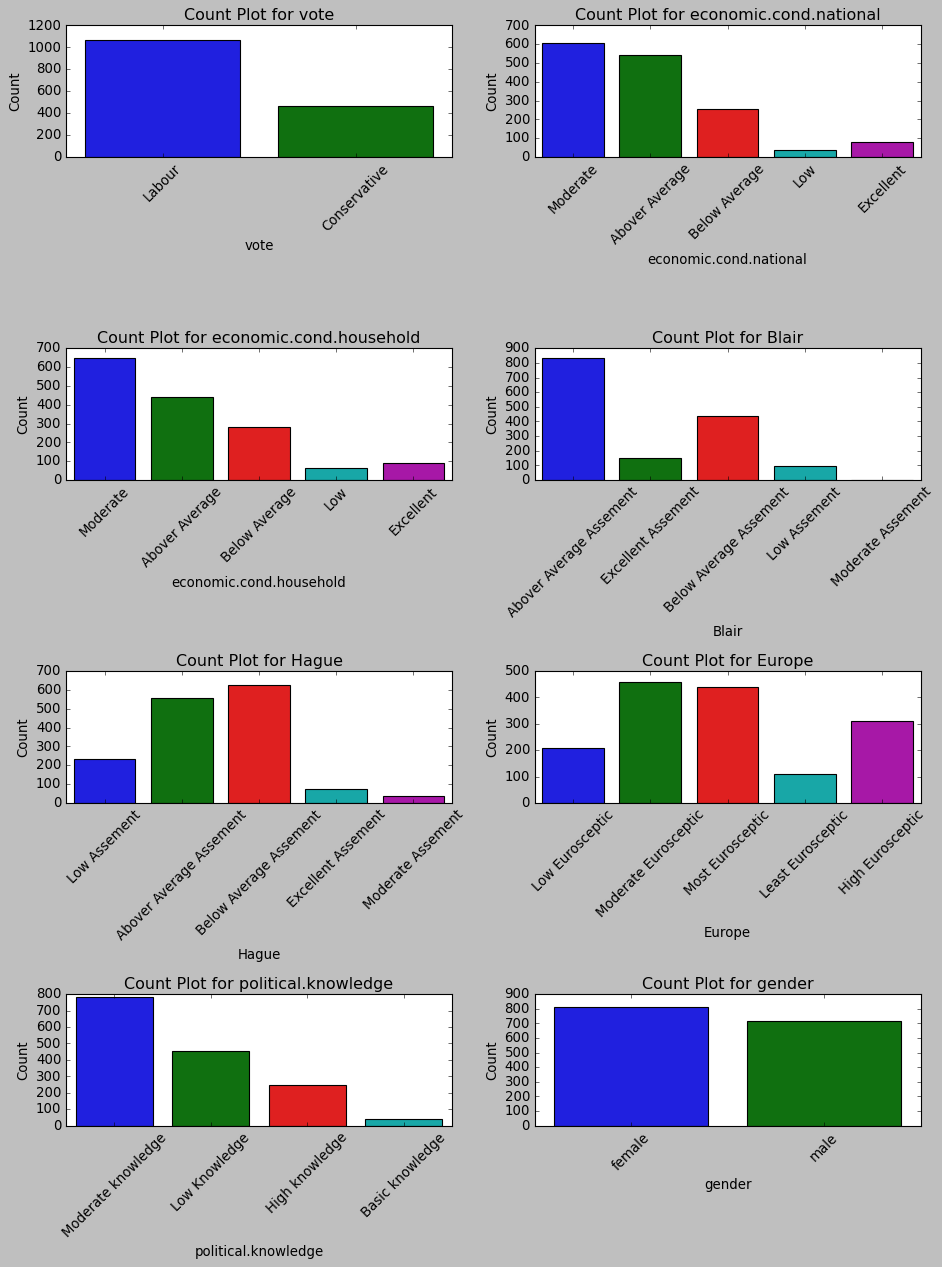

In [40]:
# Assuming you have a DataFrame named 'categorical_df' with categorical columns

# Calculate the number of rows and columns for the subplots
num_categorical_columns = len(categorical_df.columns)
num_rows = math.ceil(num_categorical_columns / 2)
num_cols = min(num_categorical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]

# Loop through categorical columns
for i, column in enumerate(categorical_df.columns):
                         
    sns.countplot(data=categorical_df, x=column, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(num_categorical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


<Axes: xlabel='age', ylabel='Density'>

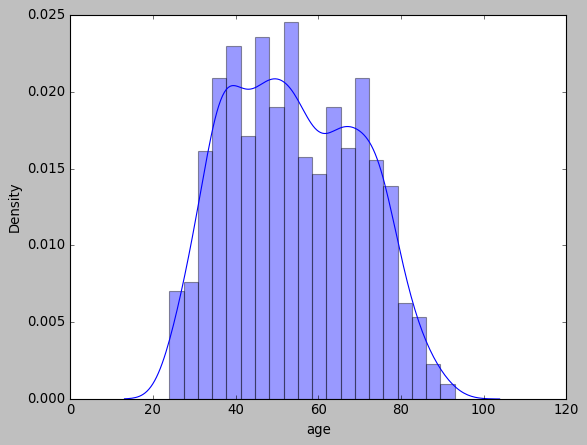

In [41]:
sns.distplot(numerical_df['age'],bins=20)

<Axes: >

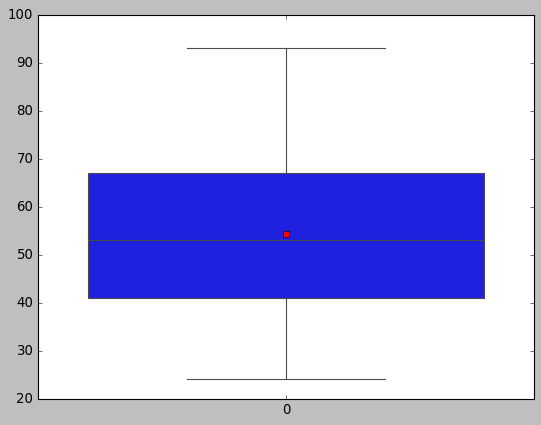

In [42]:
sns.boxplot(numerical_df['age'],showmeans=True)

In [43]:
statistic, p_value = shapiro(numerical_df['age'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check the significance level (commonly 0.05)
alpha = 0.05

# Interpret the results
if p_value > alpha:
    print("The 'age' column follows a normal distribution (fail to reject the null hypothesis)")
else:
    print("The 'age' column does not follow a normal distribution (reject the null hypothesis)")


Shapiro-Wilk Test Statistic: 0.9757
P-value: 0.0000
The 'age' column does not follow a normal distribution (reject the null hypothesis)


Given the very low p-value (less than 0.05), we would reject the null hypothesis. Therefore, based on the Shapiro-Wilk test, there is sufficient evidence to suggest that the 'age' column does not follow a normal distribution. The departure from normality might be due to skewness, outliers, or other factors.

In [44]:
# Calculate skewness and kurtosis directly for the 'age' column
skewness = skew(numerical_df['age'])
kurt = kurtosis(numerical_df['age'])

# Print the results
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")


Skewness: 0.1445
Kurtosis: -0.9477


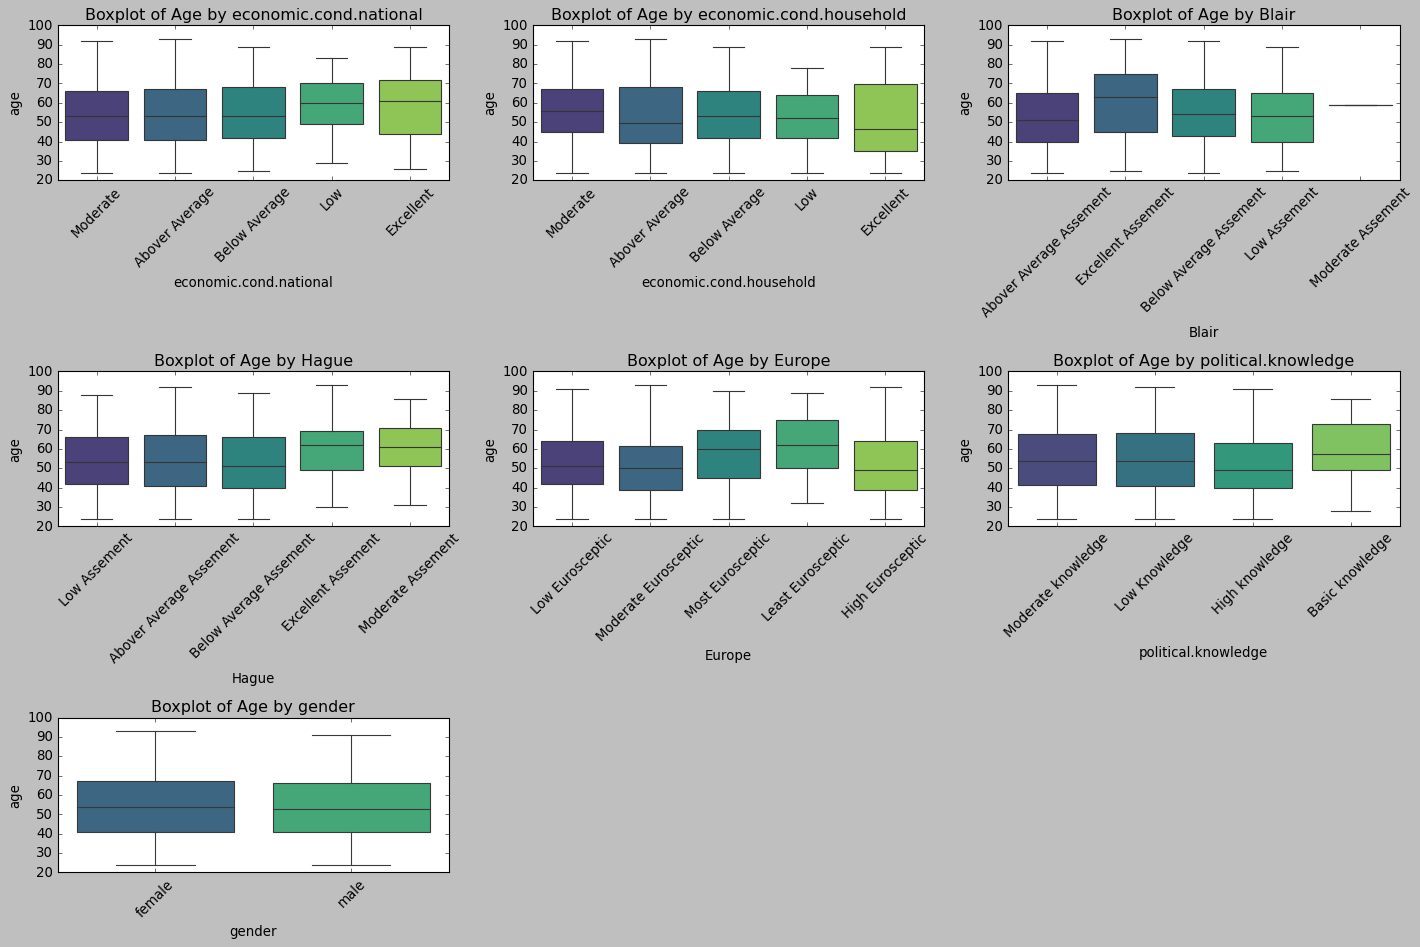

In [45]:
# Selecting relevant columns for the analysis
selected_columns = ['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
df_selected = df[selected_columns]

# Create a box plot for 'age' by each categorical variable
plt.figure(figsize=(18, 12))

for i, category in enumerate(['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=category, y='age', data=df_selected, palette='viridis')
    plt.title(f'Boxplot of Age by {category}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Bivariate Analysis: Creating a Box Plot to Visualize Age Distribution

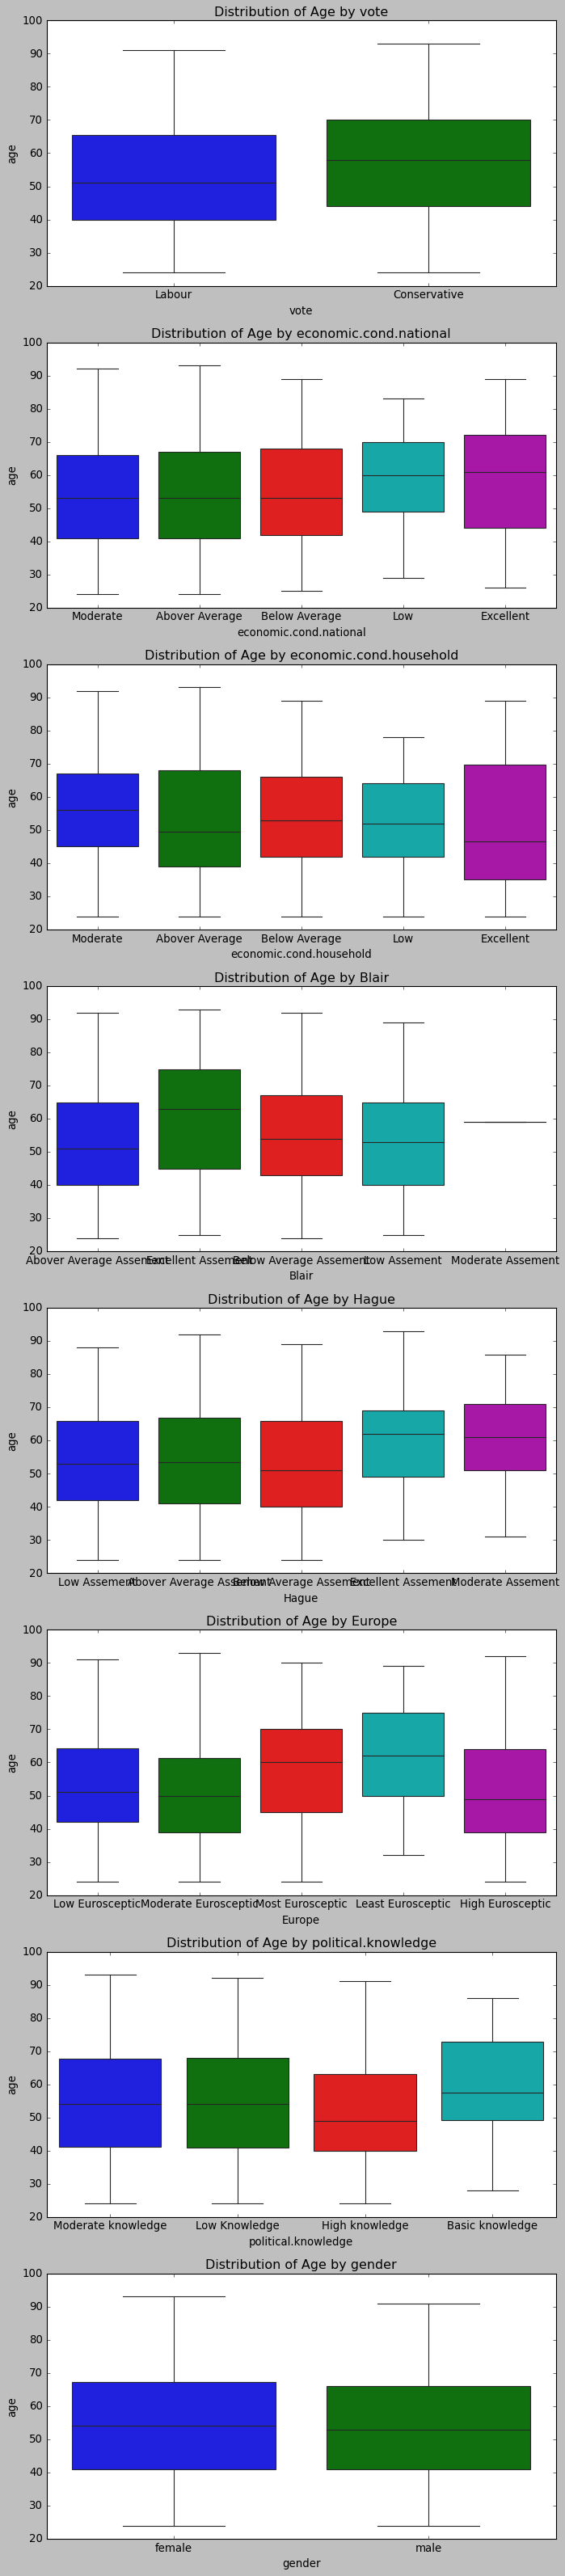

In [46]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_df.columns), ncols=1, figsize=(9, 5 * len(categorical_df.columns)))

# Iterate through each categorical column
for i, object_column in enumerate(categorical_df.columns):
    # Create a box plot for each categorical column
    sns.boxplot(ax=axes[i], x=object_column, y='age', data=df)
    axes[i].set_title(f'Distribution of Age by {object_column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Get the list of object columns
object_columns = df.select_dtypes(include='object').columns

# Iterate through each object column and calculate the mean age
for object_column in object_columns:
    mean_age_by_category = df.groupby(object_column)['age'].mean()
    print(f"Mean age by {object_column}:\n{mean_age_by_category}\n")


Mean age by vote:
vote
Conservative    56.870130
Labour          53.014111
Name: age, dtype: float64

Mean age by economic.cond.national:
economic.cond.national
Abover Average    54.014760
Below Average     54.272374
Excellent         58.768293
Low               57.513514
Moderate          53.471170
Name: age, dtype: float64

Mean age by economic.cond.household:
economic.cond.household
Abover Average    52.627273
Below Average     54.210714
Excellent         51.315217
Low               51.923077
Moderate          55.859568
Name: age, dtype: float64

Mean age by Blair:
Blair
Abover Average Assement    52.898325
Below Average Assement     54.657534
Excellent Assement         60.477124
Low Assement               53.123711
Moderate Assement          59.000000
Name: age, dtype: float64

Mean age by Hague:
Hague
Abover Average Assement    54.157706
Below Average Assement     53.092949
Excellent Assement         58.328767
Low Assement               54.721030
Moderate Assement          61.3513

The examination of mean age across distinct categories provides nuanced insights into the complex interdependencies between age and various socio-political factors. Regarding voting preferences, there appears to be a discernible age-related divergence, with Conservative voters exhibiting a higher mean age (56.87) in comparison to Labour voters (53.01). Perceptions of economic conditions contribute to age-related variations, with individuals assessing conditions as "Excellent" showcasing a higher mean age of 58.77, contrasting with a lower mean age of 53.47 for those with a "Moderate" assessment. Assessments of political figures such as Blair and Hague also reveal age-related nuances, as individuals with an "Excellent" assessment tend to have higher mean ages. Attitudes toward Europe demonstrate a striking age-related gradient, with the "Least Eurosceptic" group exhibiting the highest mean age (61.34), while the "High Eurosceptic" group has the lowest mean age (51.25). Political knowledge further accentuates these variations, with those possessing "High knowledge" exhibiting a lower mean age of 51.60, indicating a potential generational difference in political awareness. Lastly, a subtle distinction in mean age between genders emerges, with females having a slightly higher mean age (54.47) compared to males (53.85). These findings collectively underscore the intricate connections between age and diverse socio-political factors, forming a foundation for deeper explorations into the driving forces behind age dynamics within the dataset.

In [48]:
from scipy.stats import chi2_contingency

# Selecting relevant columns for the analysis
selected_columns = ['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
df_selected = df[selected_columns]

# Loop through each variable and perform chi-square test
alpha = 0.05

for variable in selected_columns[1:]:  # Skip 'vote'
    crosstab_result = pd.crosstab(df_selected['vote'], df_selected[variable])
    chi2, p, _, _ = chi2_contingency(crosstab_result)

    print(f"\nChi-square test for {variable} and 'vote'")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")

    # Interpret the results
    if p < alpha:
        print("There is a significant association between the variables.")
    else:
        print("There is no significant association between the variables.")



Chi-square test for economic.cond.national and 'vote'
Chi-square statistic: 145.48418462994104
P-value: 1.88897478759981e-30
There is a significant association between the variables.

Chi-square test for economic.cond.household and 'vote'
Chi-square statistic: 58.012210492193184
P-value: 7.586093275948135e-12
There is a significant association between the variables.

Chi-square test for Blair and 'vote'
Chi-square statistic: 284.95474413297563
P-value: 1.9039122535237184e-60
There is a significant association between the variables.

Chi-square test for Hague and 'vote'
Chi-square statistic: 344.809976068228
P-value: 2.3148701249710484e-73
There is a significant association between the variables.

Chi-square test for Europe and 'vote'
Chi-square statistic: 242.36611676948422
P-value: 2.86997051631499e-51
There is a significant association between the variables.

Chi-square test for political.knowledge and 'vote'
Chi-square statistic: 32.82998736820569
P-value: 3.497883904285619e-07
The

The chi-square tests conducted to examine associations between various socio-political variables and voting preferences yield noteworthy insights. Significantly low p-values across multiple variables, including economic conditions at the national and household levels, assessments of political figures (Blair and Hague), attitudes toward Europe, and political knowledge, suggest strong associations with voting choices. These findings imply that individuals' perspectives on economic conditions, political figures, and broader geopolitical issues are influential factors in determining their voting preferences. The absence of a significant association between gender and voting choices, as indicated by the higher p-value (0.16), suggests that gender may not be a prominent determinant of voting behavior in this dataset. These results collectively underscore the intricate web of socio-political factors that contribute to individuals' voting decisions, emphasizing the need for a multifaceted understanding of the influences shaping electoral choices.

# Multivariate Analysis

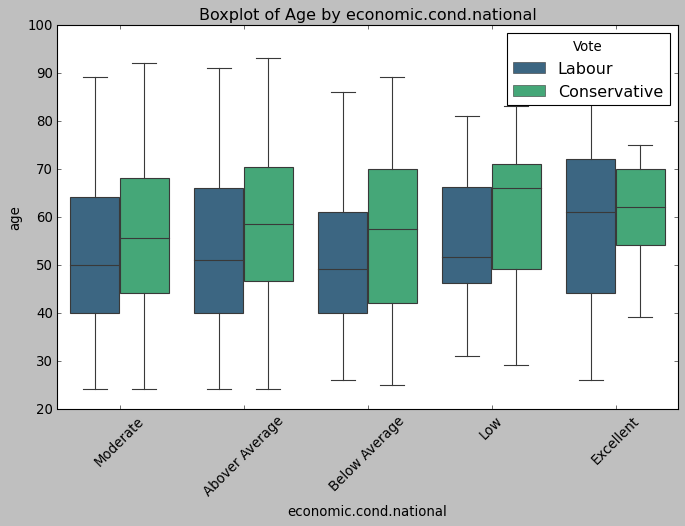

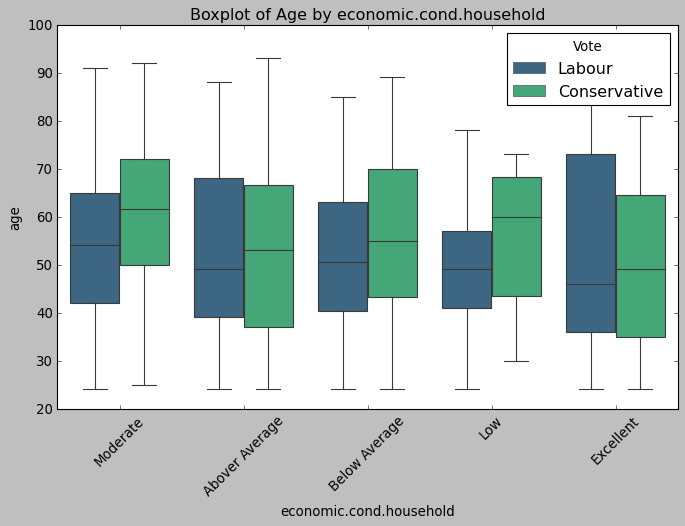

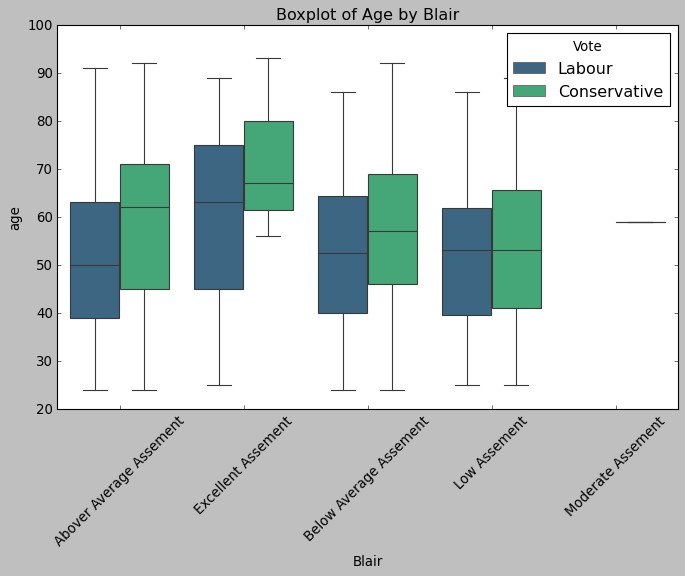

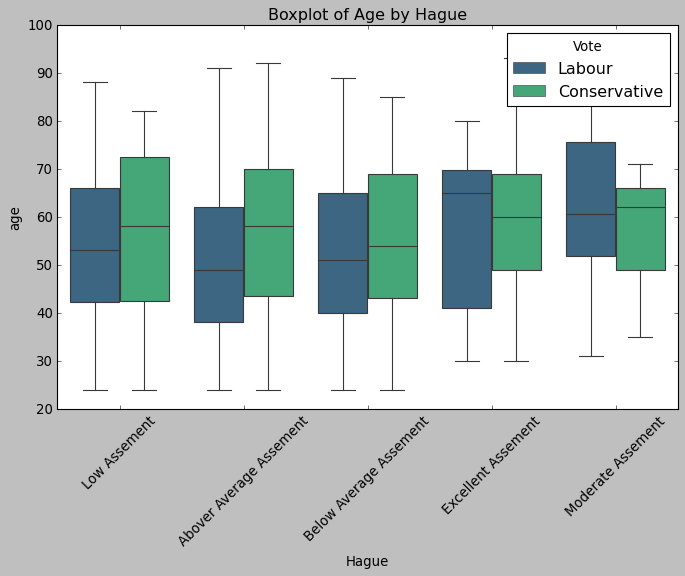

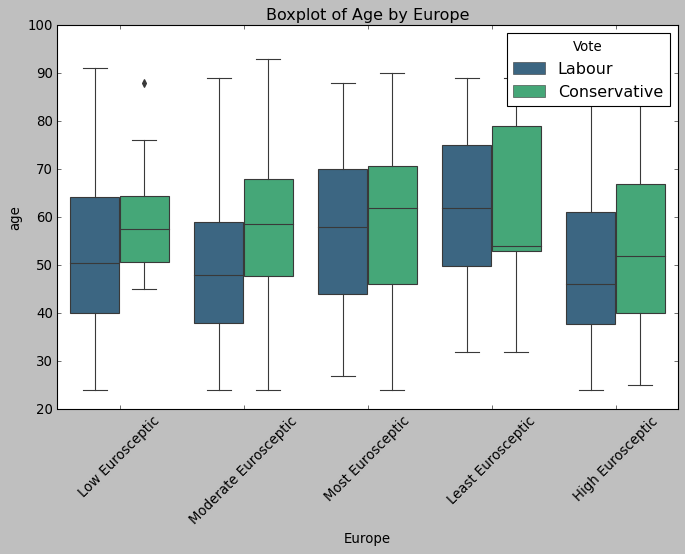

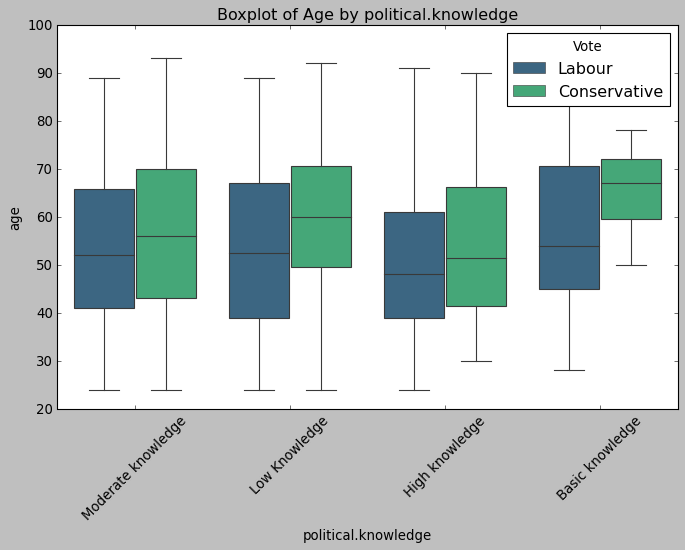

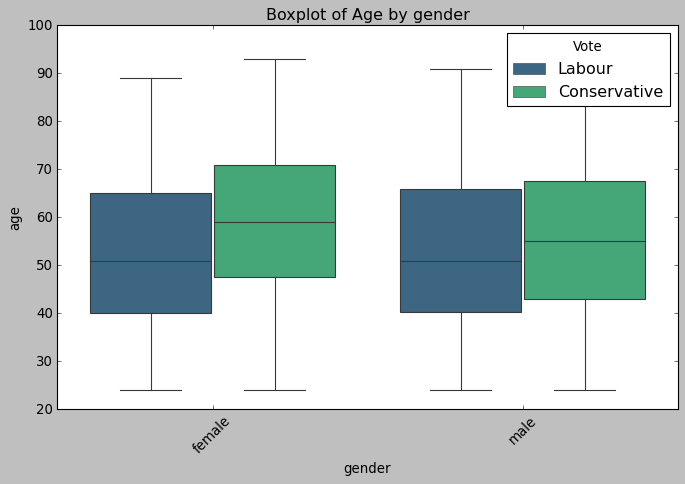

In [49]:
# Selecting relevant columns for the analysis
selected_columns = ['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
df_selected = df[selected_columns]

# Create separate grouped box plots for 'Labour' and 'Conservative' votes for each categorical variable
for category in ['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category, y='age', hue='vote', data=df_selected, palette='viridis')
    plt.title(f'Boxplot of Age by {category}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Vote', loc='upper right')
    plt.show()


In [50]:
df["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [51]:
reverse_mapping= {v: k for k, v in Mapping.items()}
df['economic.cond.national']=df['economic.cond.national'].replace(reverse_mapping)

In [52]:
df['economic.cond.household']=df['economic.cond.household'].replace(reverse_mapping)

In [53]:
reverse_mapping1= {v: k for k, v in Mapping1.items()}
df['Blair']=df['Blair'].replace(reverse_mapping1)

In [54]:
df['Hague']=df['Hague'].replace(reverse_mapping1)

In [55]:
reverse_mapping3= {v: k for k, v in mapping3.items()}
df['Europe']=df['Europe'].replace(reverse_mapping3)

In [56]:
reverse_mapping4= {v: k for k, v in mapping4.items()}
df['political.knowledge']=df['political.knowledge'].replace(reverse_mapping4)

In [57]:
df['vote']=df['vote'].replace({'Labour':0,'Conservative':1})

In [58]:
df=pd.get_dummies(df,drop_first=True)
df.sample()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1255,0,34,4,4,2,2,5,2,0


In [59]:
# Calculate standard deviation and variance
feature_stats = df.std().to_frame(name='std').transpose().append(df.var().to_frame(name='var').transpose())

# Display the calculated statistics
print("Feature Statistics:")
print(feature_stats)


Feature Statistics:
         vote         age  economic.cond.national  economic.cond.household  \
std  0.459685   15.711209                0.880969                 0.929951   
var  0.211310  246.842075                0.776107                 0.864810   

        Blair     Hague    Europe  political.knowledge  gender_male  
std  1.174824  1.230703  1.236276             1.083315     0.499109  
var  1.380212  1.514631  1.528378             1.173571     0.249110  


In [60]:
df["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [61]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [62]:
smote = SMOTE(sampling_strategy='auto')  # You can adjust the 'sampling_strategy' parameter as needed

X, Y = smote.fit_resample(x, y)


In [63]:
Y.value_counts()

0    1063
1    1063
Name: vote, dtype: int64

In [64]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3, random_state=0)

In [65]:
scaler = StandardScaler()
Xtrain= scaler.fit_transform(Xtrain)
Xtest= scaler.transform(Xtest)

Logistic Regression
Test accuracy: 0.8275862068965517
Test confusion matrix : [[252  58]
 [ 52 276]]
Test roc_auc_score 0.827183320220299
Train accuracy: 0.8346774193548387
Train confusion matrix : [[623 130]
 [116 619]]
Train roc_auc_score 0.8347670542320513


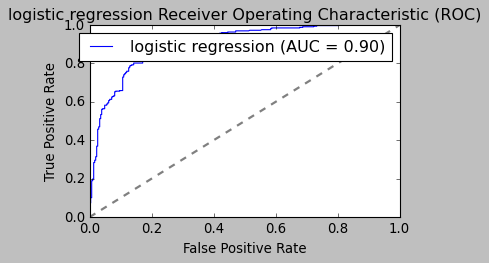

In [66]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
lg_pred=lg.predict(Xtest)
lg_pred1=lg.predict(Xtrain)
print("Logistic Regression")
print("Test accuracy:",accuracy_score(Ytest, lg_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, lg_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,lg_pred))

print("Train accuracy:",accuracy_score(Ytrain, lg_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, lg_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,lg_pred1))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, lg.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'logistic regression (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'logistic regression Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Linear Discriminant Analysis
Test accuracy: 0.829153605015674
Test confusion matrix: [[254  56]
 [ 53 275]]
Test roc_auc_score: 0.8288847364280094
Train accuracy: 0.834005376344086
Train confusion matrix: [[624 129]
 [118 617]]
Train roc_auc_score: 0.8340705206385344


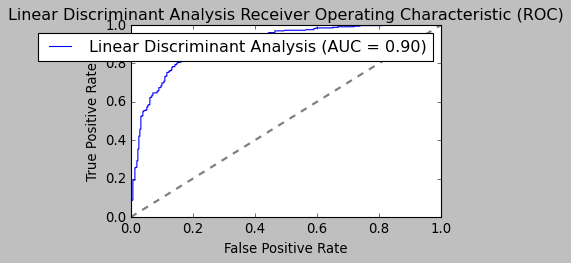

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)
lda_pred = lda.predict(Xtest)
lda_pred_train = lda.predict(Xtrain)

print('Linear Discriminant Analysis')
print("Test accuracy:", accuracy_score(Ytest, lda_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, lda_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, lda_pred))

print("Train accuracy:", accuracy_score(Ytrain, lda_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, lda_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, lda_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, lda.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Linear Discriminant Analysis (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Linear Discriminant Analysis Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


k-Nearest Neighbors Classifier
Test accuracy: 0.8181818181818182
Test confusion matrix: [[236  74]
 [ 42 286]]
Test roc_auc_score: 0.8166207710464202
Train accuracy: 0.8803763440860215
Train confusion matrix: [[632 121]
 [ 57 678]]
Train roc_auc_score: 0.8808792042713499


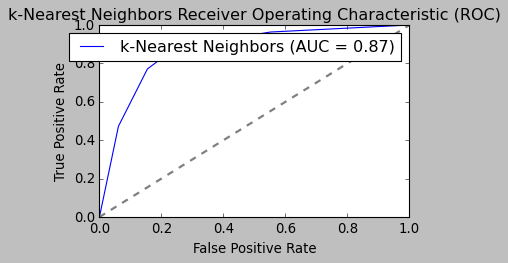

In [68]:
# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
knn = KNeighborsClassifier() 
knn.fit(Xtrain, Ytrain)
knn_pred = knn.predict(Xtest)
knn_pred_train = knn.predict(Xtrain)

print('k-Nearest Neighbors Classifier')
print("Test accuracy:", accuracy_score(Ytest, knn_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, knn_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, knn_pred))

print("Train accuracy:", accuracy_score(Ytrain, knn_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, knn_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, knn_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, knn.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'k-Nearest Neighbors (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'k-Nearest Neighbors Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Gaussian Naive Bayes Classifier
Test accuracy: 0.8213166144200627
Test confusion matrix: [[250  60]
 [ 54 274]]
Test roc_auc_score: 0.8209087332808811
Train accuracy: 0.8259408602150538
Train confusion matrix: [[628 125]
 [134 601]]
Train roc_auc_score: 0.8258422093937176


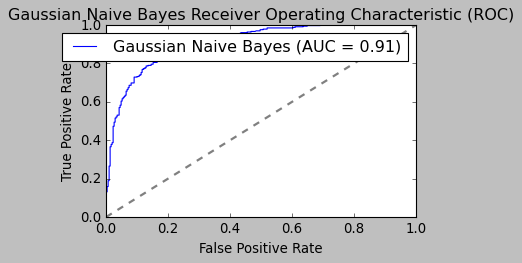

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
naive_bayes = GaussianNB()
naive_bayes.fit(Xtrain, Ytrain)
nb_pred = naive_bayes.predict(Xtest)
nb_pred_train = naive_bayes.predict(Xtrain)

print('Gaussian Naive Bayes Classifier')
print("Test accuracy:", accuracy_score(Ytest, nb_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, nb_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, nb_pred))

print("Train accuracy:", accuracy_score(Ytrain, nb_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, nb_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, nb_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, naive_bayes.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Gaussian Naive Bayes Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


RandomForest
Test accuracy: 0.8557993730407524
Test confusion matrix : [[258  52]
 [ 40 288]]
Test roc_auc_score 0.8551534225019669
Train accuracy: 0.9973118279569892
Train confusion matrix : [[750   3]
 [  1 734]]
Train roc_auc_score 0.9973276960186466


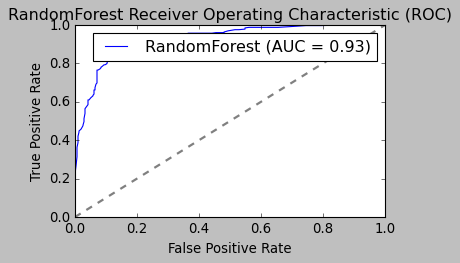

In [70]:
rf=RandomForestClassifier(n_jobs=-1)
rf.fit(Xtrain,Ytrain.values.ravel())
rf_pred=rf.predict(Xtest)
rf_pred1=rf.predict(Xtrain)
print('RandomForest')
print("Test accuracy:",accuracy_score(Ytest, rf_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, rf_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,rf_pred))
print("Train accuracy:",accuracy_score(Ytrain, rf_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, rf_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,rf_pred1))


# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, rf.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'RandomForest Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Decision Tree Classifier
Test accuracy: 0.8056426332288401
Test confusion matrix: [[241  69]
 [ 55 273]]
Test roc_auc_score: 0.8048682140047206
Train accuracy: 0.9973118279569892
Train confusion matrix: [[751   2]
 [  2 733]]
Train roc_auc_score: 0.997311434533973


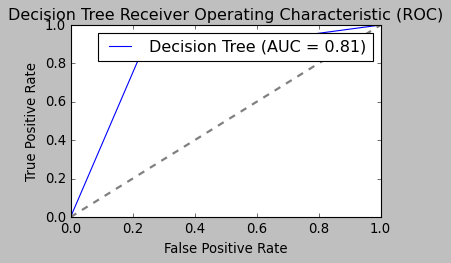

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
decision_tree = DecisionTreeClassifier()
decision_tree.fit(Xtrain, Ytrain)
dt_pred = decision_tree.predict(Xtest)
dt_pred_train = decision_tree.predict(Xtrain)

print('Decision Tree Classifier')
print("Test accuracy:", accuracy_score(Ytest, dt_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, dt_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, dt_pred))

print("Train accuracy:", accuracy_score(Ytrain, dt_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, dt_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, dt_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, decision_tree.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Decision Tree Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


Gradient Boosting Classifier
Test accuracy: 0.8463949843260188
Test confusion matrix: [[253  57]
 [ 41 287]]
Test roc_auc_score: 0.8455645161290323
Train accuracy: 0.8918010752688172
Train confusion matrix: [[655  98]
 [ 63 672]]
Train roc_auc_score: 0.8920698159741984


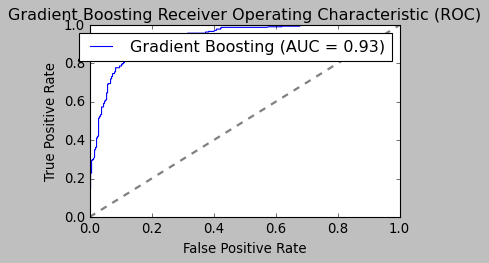

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(Xtrain, Ytrain)
gb_pred = gradient_boosting.predict(Xtest)
gb_pred_train = gradient_boosting.predict(Xtrain)

print('Gradient Boosting Classifier')
print("Test accuracy:", accuracy_score(Ytest, gb_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, gb_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, gb_pred))

print("Train accuracy:", accuracy_score(Ytrain, gb_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, gb_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, gb_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, gradient_boosting.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Gradient Boosting Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


AdaBoost Classifier
Test accuracy: 0.8181818181818182
Test confusion matrix: [[248  62]
 [ 54 274]]
Test roc_auc_score: 0.8176829268292684
Train accuracy: 0.8548387096774194
Train confusion matrix: [[638 115]
 [101 634]]
Train roc_auc_score: 0.8549312952272543


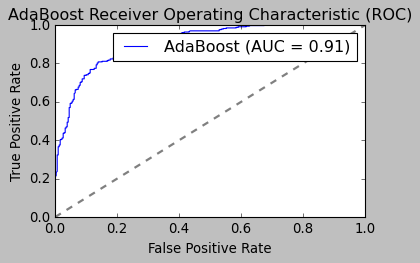

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
adaboost = AdaBoostClassifier()
adaboost.fit(Xtrain, Ytrain)
adaboost_pred = adaboost.predict(Xtest)
adaboost_pred_train = adaboost.predict(Xtrain)

print('AdaBoost Classifier')
print("Test accuracy:", accuracy_score(Ytest, adaboost_pred))
print("Test confusion matrix:", confusion_matrix(Ytest, adaboost_pred))
print("Test roc_auc_score:", roc_auc_score(Ytest, adaboost_pred))

print("Train accuracy:", accuracy_score(Ytrain, adaboost_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, adaboost_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, adaboost_pred_train))

# Calculate ROC curve variables
fpr, tpr, thresholds = roc_curve(Ytest, adaboost.predict_proba(Xtest)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AdaBoost Receiver Operating Characteristic (ROC)')  # Include model name in the title
plt.legend()
plt.show()


In [74]:

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    },
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Find and evaluate the best model using Grid Search
best_model = None
best_score = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    # Use F1 score as the scoring metric
    f1_scorer = make_scorer(f1_score)
    
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=f1_scorer, verbose=3)
    grid_search.fit(Xtrain, Ytrain.values.ravel())
    score = grid_search.best_score_
   
    if score > best_score:
        best_model = grid_search.best_estimator_
        best_score = score

print(f'Best Model: {type(best_model).__name__}')
print(f'Best Model Score: {best_score:.3f}')


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Model: RandomForestClassifier
Best Model Score: 0.860


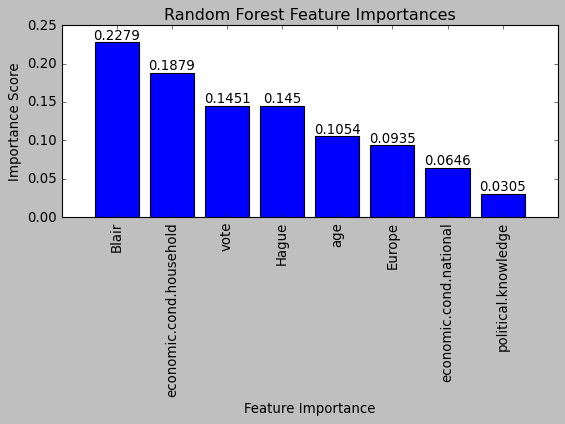

In [93]:
# Get feature names or indices 
feature_names = your_dataframe.columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(8, 3))
bars = plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")

# Display numeric values on the bars
for bar in bars:
    yval = round(bar.get_height(), 4)
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


In [94]:
# Get feature names or indices (replace with your actual feature names or indices)
feature_names = your_dataframe.columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Display feature importance values
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")


Blair: 0.22788945655798837
economic.cond.household: 0.18794073377643838
vote: 0.145122200718023
Hague: 0.14503093705550024
age: 0.10541763342379229
Europe: 0.09352687400970446
economic.cond.national: 0.06455398666238801
political.knowledge: 0.0305181777961654


Model: Logistic Regression
Train Accuracy: 0.8346774193548387
Train Confusion Matrix:
[[623 130]
 [116 619]]

Test Accuracy: 0.8275862068965517
Test Confusion Matrix:
[[252  58]
 [ 52 276]]


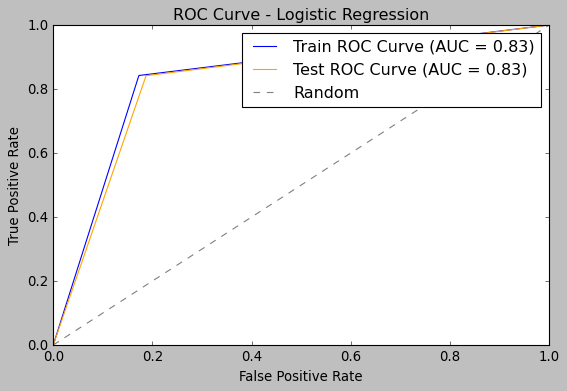


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       310
           1       0.83      0.84      0.83       328

    accuracy                           0.83       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.83      0.83      0.83       638

Model: Linear Discriminant Analysis
Train Accuracy: 0.834005376344086
Train Confusion Matrix:
[[624 129]
 [118 617]]

Test Accuracy: 0.829153605015674
Test Confusion Matrix:
[[254  56]
 [ 53 275]]


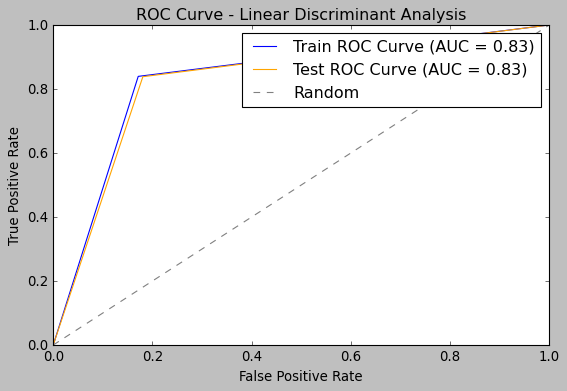


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       310
           1       0.83      0.84      0.83       328

    accuracy                           0.83       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.83      0.83      0.83       638

Model: K-Nearest Neighbors
Train Accuracy: 0.8803763440860215
Train Confusion Matrix:
[[632 121]
 [ 57 678]]

Test Accuracy: 0.8181818181818182
Test Confusion Matrix:
[[236  74]
 [ 42 286]]


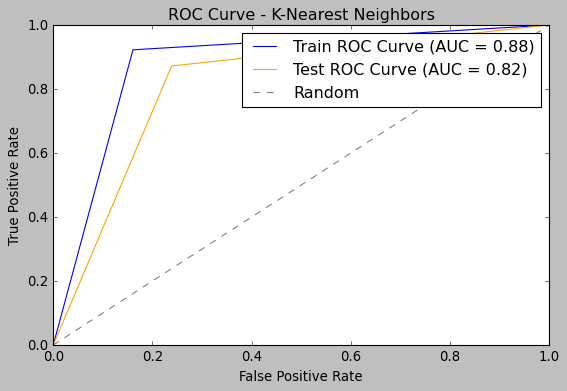


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       310
           1       0.79      0.87      0.83       328

    accuracy                           0.82       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.82      0.82      0.82       638

Model: Naïve Bayes
Train Accuracy: 0.8259408602150538
Train Confusion Matrix:
[[628 125]
 [134 601]]

Test Accuracy: 0.8213166144200627
Test Confusion Matrix:
[[250  60]
 [ 54 274]]


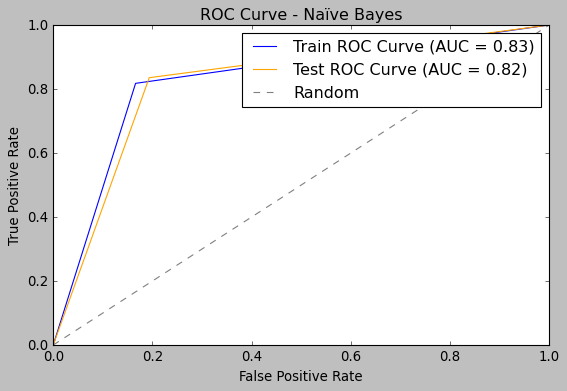


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       310
           1       0.82      0.84      0.83       328

    accuracy                           0.82       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.82      0.82      0.82       638

Model: Random Forest
Train Accuracy: 0.9327956989247311
Train Confusion Matrix:
[[692  61]
 [ 39 696]]

Test Accuracy: 0.8589341692789969
Test Confusion Matrix:
[[264  46]
 [ 44 284]]


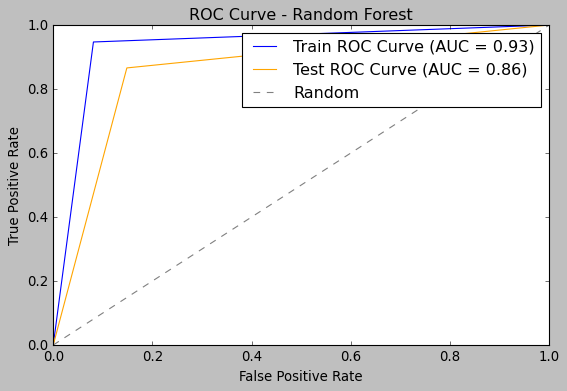


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       310
           1       0.86      0.87      0.86       328

    accuracy                           0.86       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.86      0.86      0.86       638



In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Create a list of models
models = {'Logistic Regression': lg, 'Linear Discriminant Analysis': lda, 'K-Nearest Neighbors': knn, 'Naïve Bayes': naive_bayes, 'Random Forest': best_model}

# Evaluate each model
for model_name, model in models.items():
    # Train set predictions
    train_predictions = model.predict(Xtrain)
    train_accuracy = accuracy_score(Ytrain, train_predictions)
    train_cm = confusion_matrix(Ytrain, train_predictions)
    
    # Test set predictions
    test_predictions = model.predict(Xtest)
    test_accuracy = accuracy_score(Ytest, test_predictions)
    test_cm = confusion_matrix(Ytest, test_predictions)
    
    # ROC curve and ROC AUC score
    train_fpr, train_tpr, _ = roc_curve(Ytrain, train_predictions)
    test_fpr, test_tpr, _ = roc_curve(Ytest, test_predictions)
    roc_auc_train = roc_auc_score(Ytrain, train_predictions)
    roc_auc_test = roc_auc_score(Ytest, test_predictions)
    
    # Classification report
    classification_rep = classification_report(Ytest, test_predictions)
    
    # Print results
    print(f"Model: {model_name}")
    print("Train Accuracy:", train_accuracy)
    print("Train Confusion Matrix:")
    print(train_cm)
    
    print("\nTest Accuracy:", test_accuracy)
    print("Test Confusion Matrix:")
    print(test_cm)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})', color='blue')
    plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})', color='orange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
    print("\nClassification Report:")
    print(classification_rep)
    print("="*50)
